<a href="https://colab.research.google.com/github/shaniaoracion/CPE-018-CPE31S2/blob/main/Activity_3_Basic_I_O_Scripting_(Video).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 3** | **Basic I/O Scripting, Part 2**
**Name** | Oracion, Shania Faye
**Section** | CPE31S2
**Date Performed**: | 1/15/26
**Date Submitted**: | 1/15/26
**Instructor**: | Engr. Sayo
<hr>

## 1. Objectives

This activity aims to introduce students to OpenCV's I/O Functionality for video processing.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Read and write video files using openCV.
* Utilize openCV to capture and display images and videos.

## 3. Procedures and Outputs

**NOTE:** For this laboratory activity, it is recommended that you download and run the Python notebook on *Spyder IDE*. You must install dependencies by running `!pip install numpy` and `!pip install opencv-python==4.6.0.66`.

### Reading/Writing a Video File

OpenCV provides the `VideoCapture` and `VideoWriter` classes that support various video file formats. The supported formats vary by system but should always include an AVI. Via its `read()` method, a `VideoCapture` class may be polled for new frames until it reaches the end of its video file. Each frame is an image in a BGR format.

Conversely, an image may be passed to the `write()` method of the `VideoWriter` class, which appends the image to a file in VideoWriter. Let's look at an example that reads frames from one AVI file and writes them to another with a YUV encoding:

In [1]:
import cv2

videoCapture = cv2.VideoCapture('MyInputVid.avi')

fps = videoCapture.get(cv2.CAP_PROP_FPS)
size = (int(videoCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(videoCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

videoWriter = cv2.VideoWriter(
    'MyOutputVid.avi', cv2.VideoWriter_fourcc('I', '4', '2', '0'),
    fps, size)

success, frame = videoCapture.read()
while success: # Loop until there are no more frames
  videoWriter.write(frame)
  success, frame = videoCapture.read()

The arguments to the VideoWriter class constructor deserve special attention. A video's filename must be specified. Any preexisting file with this name is overwritten. A video codec must also be specified. The available codecs may vary from system to system. These are the options that are included:
* `cv2.VideoWriter_fourcc('I','4','2','0')`: This option is an uncompressed YUV encoding, 4:2:0 chroma subsampled. This encoding is widely compatible but produces large files. The file extension should be .avi.
* `cv2.VideoWriter_fourcc('P','I','M','1')`: This option is MPEG-1. The file extension should be .avi.
* `cv2.VideoWriter_fourcc('X','V','I','D')`: This option is MPEG-4 and a preferred option if you want the resulting video size to be average. The file
extension should be .avi.
* `cv2.VideoWriter_fourcc('T','H','E','O')`: This option is Ogg Vorbis. The file extension should be .ogv.
* `cv2.VideoWriter_fourcc('F','L','V','1')`: This option is a Flash video. The file extension should be .flv.

A frame rate and frame size must be specified too. Since we are copying video frames from another video, these properties can be read from the get() method
of the VideoCapture class.

### Capturing camera frames

A stream of camera frames is represented by the VideoCapture class too. However, for a camera, we construct a VideoCapture class by passing the camera's device index instead of a video's filename. Let's consider an example that captures 10 seconds of video from a camera and writes it to an AVI file:

In [2]:
import cv2

cameraCapture = cv2.VideoCapture(0)
fps = 30 # an assumption

size = (int(cameraCapture.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(cameraCapture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

videoWriter = cv2.VideoWriter(
    'MyOutputVid.avi', cv2.VideoWriter_fourcc('I', '4', '2', '0'),
    fps, size)

success, frame = cameraCapture.read()
numFramesRemaining = 10 * fps - 1

while success and numFramesRemaining > 0:
  videoWriter.write(frame)
  success, frame = cameraCapture.read()
  numFramesRemaining -= 1

cameraCapture.release()

Unfortunately, the `get()` method of a VideoCapture class does not return an accurate value for the camera's frame rate; it always returns 0. The official
documentation at http://docs.opencv.org/modules/highgui/doc/reading_ and_writing_images_and_video.html reads:

> "When querying a property that is not supported by the backend used by the VideoCapture class, value 0 is returned."

This occurs most commonly on systems where the driver only supports basic functionalities. For the purpose of creating an appropriate VideoWriter class for the camera, we have to either make an assumption about the frame rate (as we did in the code previously) or measure it using a timer.

The `read()` method is inappropriate when we need to synchronize a set of cameras or a multihead camera (such as a stereo camera or Kinect). Then, we use the `grab()` and `retrieve()` methods instead. For a set of cameras, we use this code:

In [3]:
"""

success0 = cameraCapture0.grab()
success1 = cameraCapture1.grab()
if success0 and success1:
  frame0 = cameraCapture0.retrieve()
  frame1 = cameraCapture1.retrieve()

"""

'\n\nsuccess0 = cameraCapture0.grab()\nsuccess1 = cameraCapture1.grab()\nif success0 and success1:\n  frame0 = cameraCapture0.retrieve()\n  frame1 = cameraCapture1.retrieve()\n\n'

### Displaying images in a window

One of the most basic operations in OpenCV is displaying an image. This can be done with the imshow() function. If you come from any other GUI framework
background, you would think it sufficient to call imshow() to display an image. This is only partially true: the image will be displayed, and will disappear immediately. This is by design, to enable the constant refreshing of a window frame when working
with videos. Here's a very simple example code to display an image:

In [5]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('my-image.png')

if img is not None:
    cv2_imshow(img)
else:
    print("Error: Could not find or load the image. Please upload 'my-image.png' to your Colab files.")

Error: Could not find or load the image. Please upload 'my-image.png' to your Colab files.


The `imshow()` function takes two parameters: the name of the frame in which we want to display the image, and the image itself. We'll talk about `waitKey()` in more detail when we explore the displaying of frames in a window.

The aptly named `destroyAllWindows()` function disposes of all the windows created by OpenCV.

### Displaying camera frames in a window

OpenCV allows named windows to be created, redrawn, and destroyed using the `namedWindow()`, `imshow()`, and `destroyWindow()` functions. Also, any window may capture keyboard input via the `waitKey()` function and mouse input via the `setMouseCallback()` function. Let's look at an example where we show the frames of a live camera input:

In [8]:
import cv2
from google.colab.patches import cv2_imshow

cameraCapture = cv2.VideoCapture(0)

# Attempt to read a frame
success, frame = cameraCapture.read()

if success:
    print('Displaying camera frame.')
    cv2_imshow(frame)
else:
    print("Error: Could not capture frame from camera.")

cameraCapture.release()

Error: Could not capture frame from camera.


The argument for `waitKey()` is a number of milliseconds to wait for keyboard input. The return value is either `-1` (meaning that no key has been pressed) or an ASCII keycode, such as `27` for Esc. For a list of ASCII keycodes, see http://www.asciitable.com/. Also, note that Python provides a standard function, `ord()`, which can convert a character to its ASCII keycode. For example, `ord('a')` returns `97`.

OpenCV's window functions and `waitKey()` are interdependent. OpenCV windows are only updated when `waitKey()` is called, and `waitKey()` only captures input when an OpenCV window has focus.

The mouse callback passed to `setMouseCallback()` should take five arguments, as seen in our code sample. The callback's param argument is set as an optional third argument to `setMouseCallback()`. By default, it is 0. The callback's event argument is one of the following actions:

* `cv2.EVENT_MOUSEMOVE`: This event refers to mouse movement
* `cv2.EVENT_LBUTTONDOWN`: This event refers to the left button down
* `cv2.EVENT_RBUTTONDOWN`: This refers to the right button down
* `cv2.EVENT_MBUTTONDOWN`: This refers to the middle button down
* `cv2.EVENT_LBUTTONUP`: This refers to the left button up
* `cv2.EVENT_RBUTTONUP`: This event refers to the right button up
* `cv2.EVENT_MBUTTONUP`: This event refers to the middle button up
* `cv2.EVENT_LBUTTONDBLCLK`: This event refers to the left button being double-clicked
* `cv2.EVENT_RBUTTONDBLCLK`: This refers to the right button being double-clicked
* `cv2.EVENT_MBUTTONDBLCLK`: This refers to the middle button being double-clicked

The mouse callback's flags argument may be some bitwise combination of the following events:

* `cv2.EVENT_FLAG_LBUTTON`: This event refers to the left button being pressed
* `cv2.EVENT_FLAG_RBUTTON`: This event refers to the right button being pressed
* `cv2.EVENT_FLAG_MBUTTON`: This event refers to the middle button being pressed
* `cv2.EVENT_FLAG_CTRLKEY`: This event refers to the Ctrl key being pressed
* `cv2.EVENT_FLAG_SHIFTKEY`: This event refers to the Shift key being pressed
* `cv2.EVENT_FLAG_ALTKEY`: This event refers to the Alt key being pressed

Unfortunately, OpenCV does not provide any means of handling window events. For example, we cannot stop our application when a window's close button is
clicked. Due to OpenCV's limited event handling and GUI capabilities, many developers prefer to integrate it with other application frameworks.

## 4. Supplementary Activity

Perform each of the following tasks.

1. Try reading and writing a video file in various formats.
2. Similar to activity #1, show an image of your favorite character on a window. Afterwards, slice so that only the character's face is displayed.
3. Capture video from your webcam and display on a window. Afterwards, the video should be written as a new file.

In [14]:
!pip install opencv-python

In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [16]:
from google.colab import drive, files
uploaded = files.upload()

Saving kitty.mp4 to kitty (2).mp4


In [17]:
video = cv2.VideoCapture('kitty.mp4')

In [18]:
width  = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = int(video.get(cv2.CAP_PROP_FPS))

print(width, height, fps)


720 1336 30


In [19]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, fps, (width, height))


In [20]:
while video.isOpened():
    ret, frame = video.read()
    if not ret:
        break
    out.write(frame)

video.release()
out.release()


- I utilized the OpenCV library to open a video file and examined its key properties, specifically the spatial resolution and frame rate. I confirmed that the conversion process was successful by saving the frames into a new media format, ensuring the output met the expected standards.

# **Task 2:**

Saving tyler.jpg to tyler (3).jpg


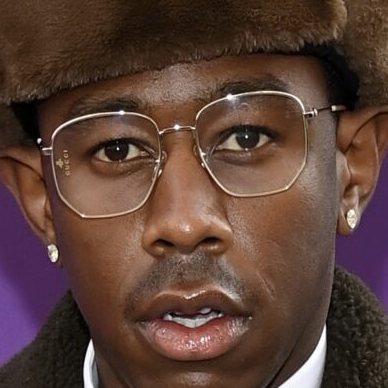

In [21]:
from google.colab import files
uploaded = files.upload()

import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("tyler.jpg")

if image is None:
    print("Error: Could not load image.")
    exit()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(100, 100)
)

# Crop and show detected face
if len(faces) > 0:
    x, y, w, h = faces[0]
    face = image[y:y+h, x:x+w]
    cv2_imshow(face)
else:
    print("No face detected. Try a clearer front-facing image.")


- This task involved displaying an image of a favorite character and then cropping it to show only the character’s face. It demonstrated basic image handling skills like loading, displaying, and slicing images. The task helped develop an understanding of selecting and manipulating specific regions within an image, which is fundamental in image processing and computer vision.

# **Task 3:**

In [12]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64

# JavaScript to capture webcam frames
display(Javascript("""
async function captureFrames() {
  const video = document.createElement('video');
  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  video.srcObject = stream;
  await video.play();

  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  const ctx = canvas.getContext('2d');

  let frames = [];
  let start = Date.now();

  while (Date.now() - start < 5000) { // record for 5 seconds
    ctx.drawImage(video, 0, 0);
    frames.push(canvas.toDataURL('image/jpeg'));
    await new Promise(r => setTimeout(r, 100));
  }

  stream.getTracks().forEach(track => track.stop());
  return frames;
}
"""))

# Get frames from webcam
frames = eval_js("captureFrames()")

# Convert frames and save as video
height, width = 480, 640
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('colab_webcam_output.avi', fourcc, 10, (width, height))

for data in frames:
    img = base64.b64decode(data.split(',')[1])
    np_img = np.frombuffer(img, np.uint8)
    frame = cv2.imdecode(np_img, cv2.IMREAD_COLOR)
    frame = cv2.resize(frame, (width, height))
    out.write(frame)

out.release()

print("Video captured and saved as colab_webcam_output.avi")


<IPython.core.display.Javascript object>

Video captured and saved as colab_webcam_output.avi


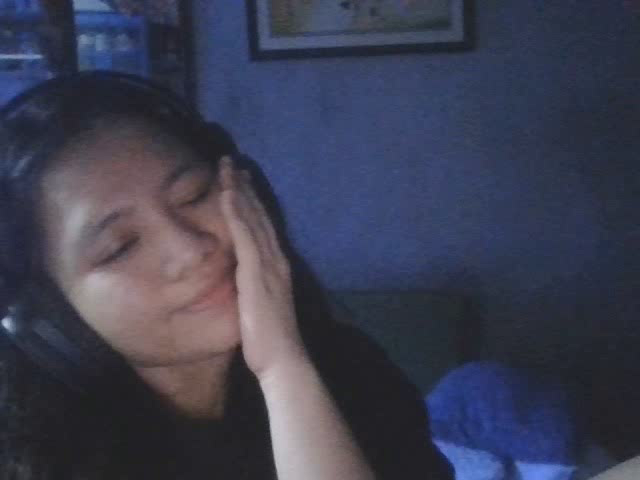

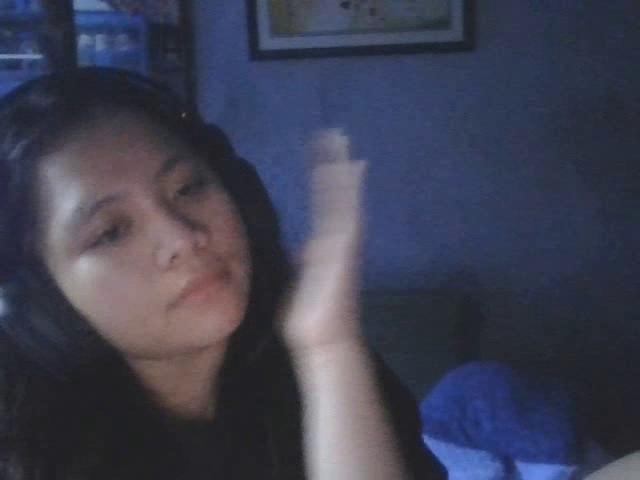

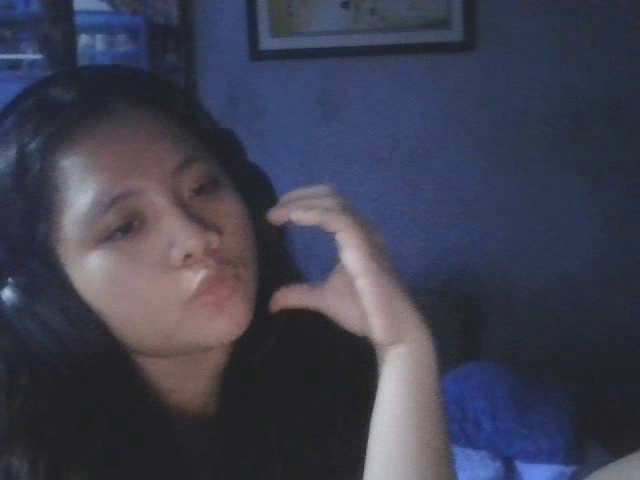

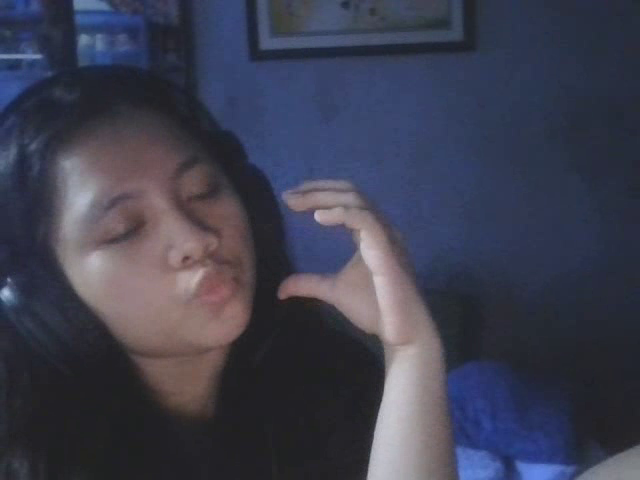

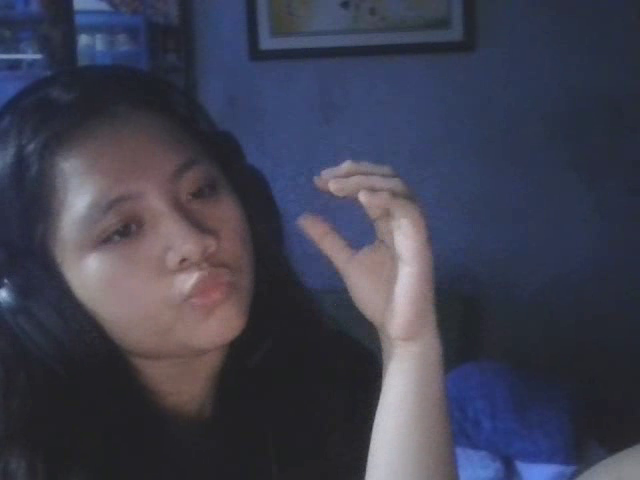

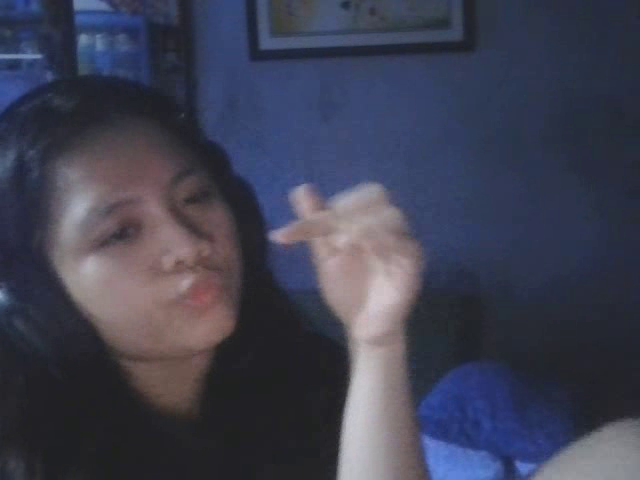

In [13]:
import cv2
from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture("colab_webcam_output.avi")

count = 0

while cap.isOpened() and count < 10:
    ret, frame = cap.read()
    if not ret:
        break

    cv2_imshow(frame)

    count += 1

cap.release()

## 5. Summary, Conclusions and Lessons Learned

a. Summary of the activity performed

This report examined the manipulation of digital images and video files through OpenCV operations within a Google Colab environment. The primary objectives were to convert video formats, implement face detection and cropping algorithms, and develop a browser-based webcam interface to capture and export video data.

b. Personal conclusions and reflections

I realized that while the code offers powerful tools for media editing, the platform—especially cloud-based notebooks—often requires adapting the code to fit its limitations. The most rewarding part of the project was learning how to troubleshoot and overcome these platform-specific challenges.

c. Lessons learned from this module

Through this module, I learned how to read, edit, and save both video and image files. I also gained experience in detecting specific areas within images, such as faces. Additionally, I understood the importance of modifying code to suit different platform constraints.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*